## Using Linear Regression for classification

Linear Regression , although is a regression algorithm but can be used in classification problems also. 

Lets consider an example where the results of linear regression are between 0 and 5 (real numbers like 3.567) and we need to classify the data into 6 categories i.e. 0,1,2,3,4,5 .A simple way of using this for classification is to just round off the result to the nearest integer between 0 and 5. So , if the result from linaer regression is [1.23 , 0.43 , 4.32 , 3.49] we get the results of our classification as [1,0,4,3] .

We need to set the thresholds for classification . In the above exapmle thresholds were : [0-0.5) for 0 , [0.5,1.5) for 1 , [1.5,2.5) for 2 and so on. You can decide your own threshold values depending on the data you have. 

#### Why is linear regression bad for classification?

Linear Regression can be used for classification by defining appropriate threshold values , but it is not the right algorithm for classification problems because -
1. Outliers can affect the best fit line and thus the decision boundary.
2. Values predicted by Linear Regression will be continuous, whereas expected results will be discrete.

With linear regression you fit a polynomial through the data - say, like in the example below we're fitting a straight line through {tumor size, tumor type} sample set:
<img src="one.png">
Above, malignant tumors get 1 and non-malignant ones get 0, and the green line is our hypothesis h(x). To make predictions we may say that for any given tumor size x, if h(x) gets greater than 0.5 we predict malignant tumor, otherwise we predict benign.

It seems that everytime we have the right answer according to the data above , right? Now lets change the data a little bit and for a quite large value of tumor size lets add a Malilgnant cancer data point. Now our line h(x) begins to look somewhat like this->
<img src="three.png">
We can clearly see that now the predictions are not correct. Because we are trying to fit a line through the data we are getting , the line will be dependant on the quality and type of data we get. We cannot change the hypothesis each time a new sample arrives. Instead, we should learn it off the training set data, and then (using the hypothesis we've learned) make correct predictions for the data we haven't seen before. This can be done by creating a decision boundary.

Decision boundary is the boundary which seperates the two regions in classification. If we have a binary classification with values 0 and 1 then one side of this boundary will be 0 and the other will be 1. Take a look at the image below ->
<img src="two.png">
Here, the purple colour line is the decision boundary. All points on the left side of this line correspond to 0 and points on the right side correspond to 1. In the above problem (and also many other classification problems) we more importantly want that the points are placed on the correct side of the decision boundary and not on how far they are on the correct side . What we mean is that we are somewhat okay if the points are quite close to the decision boundary , as long as they are on the right side of it.

The above decision boundary (purple line) is similar to the one which would have been generated if we would have used Logistic Regression in the above problem(Logistic Regression is dicussed in detail next). Both linear regression and logistic regression give you a straight line (or a higher order polynomial) but those lines have different meaning:<br>
-- line for linear regression interpolates, or extrapolates, the output and predicts the value for x we haven't seen.<br>
-- h(x) for logistic regression tells you the measure (like probability) that x belongs to the "positive" class. Or you can see the line as the decision boundary.

# Logistic Regression 

Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. Logistic Regression is actually a classification algorithm. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.<br>
Before starting with Logistic regression we need to know about a function called Sigmoid function and its properties.

#### Sigmoid Function

A sigmoid function is a mathematical function having an "S" shaped curve (sigmoid curve). Mathematically , the function is :
<img src="S1.png">

and its curve looks like :
<img src="S2.png">
With its output ranging between 0 and 1. As we can clearly see that the the curve quickly goes toward 1 when t>0 and toward 0 when t<0 and at t=0 it is equal to 0.5. Value of the above function for t=2 is 0.88 and for t=-2 is 0.119 , which shows how sharply it goes towards 0 and 1.

Because of the property of sigmoid function to give output between 0 and 1 we can use its output like probability, but not exactly as probability. For example, the property of probability that P(true)+P(false)=1 may not be true is case of sigmoid function i.e. S(true)+S(false) may not be equal to 1.

The logistic function has this further, important property, that its derivative can be expressed by the function itself (),
<img src="S3.png">

As at t=0 we have S(t)=0.5 , and for t>0 we have S(t)>0.5 (sharply rising to 1 so we consider it 1) and for t<0 we have S(t)<0.5 (sharply falling to 0 so we consider it 0) , we have our decision boundary as 0.5.
For example, as our threshold is .5 and our prediction function returned .7, we would classify this observation as positive(1). If our prediction was .2 we would classify the observation as negative(0). For logistic regression with multiple classes we could select the class with the highest predicted probability.

<img src="S4.png" width="450px">

## cost function of logistic regression

Earlier in linear regression we have used the following cost function:

\begin{equation*}
 \left( \sum_{k=1}^n (y_t - y_p)^2  \right)
\end{equation*}

where in y(predicted) was replaced by its value mx.

\begin{equation*}
 \left( \sum_{k=1}^n (y - mx)^2  \right)
\end{equation*}

This cost function was of degree 2 and had only one minimum. But in the case of logistic regression if we use the same cost function then the cost function will end up having many minimas because of the hypothesis function of logistic regression. Therefore while estimating a minimum value we may end up at some local minimum rather than a global minimum.  

\begin{equation*}
 \left( \sum_{k=1}^n (y - {\frac{1}{1+e^{-mx} }})^2  \right)
\end{equation*}

So here we use CROSS ENTROPY to measure the cost of our model.
<pre style="color:brown">
                cost = -log(h(x))   if y = 1
                       -log(1-h(x)) if y = 0
</pre>
here h(x) is the hypothesis function for logistic regression(i.e sigmoid function) and y is the actual true output ,i.e the actual label , for the current considered values of features.

This error function penalizes for the wrong predictions we make.

For example, consider that y(the actual label) is 1 and we classify it as e(e is tending to zero), then our cost will be -log(e) i.e a very very high positive value, and the cost reduces as we classify it near to 1 . The cost becomes zero when we classify it correctly as 1 .
Also consider that y(the actual label) is 0 and we classify it as t(nearly equal to 1) , then the cost for that will be -log(1-t) = -log(e), where e is tending to zero,and again the cost has a very very high positive value.And the cost tends to zero when we classify it correctly as 0.
   

<img src="log.png" width="250"/>

we can combine the two cases of our cost function as :
<pre style="color:brown">
            cost = [-ylog(h(x))]-[(1-y)log(1-h(x))]
</pre>

The only parameter which we can vary in our cost function is h(x) and  therein the variable is m, as shown below. 

<img src="mwalah.jpeg" width="400"/>

Hence our aim is to improve the accuracy of our model and reduce the cost by selecting a proper value(s) for m , and we do so by GRADIENT DESCENT as it was done in linear regression.

Our cost function is a convex function i.e it has only one local minimum therefore we can use gradient descent approach to find the apt value of m .

# Multiclass classification

Multiclass Classification , as the name suggests ,are the kind of problems in which using the given parameters/features we need to classify into <b>more than 2 classes</b>.
<img src="M1.png" width="500px">
<br>Instead of y=0,1 we will expand our definition so that y=0,1...n. Basically we re-run binary classification multiple times, once for each class. <b>For each sub-problem, we select one class (YES) and lump all the others into a second class (NO). Then we take the class with the highest predicted value.</b>


Lets understand it better with the exapmle of Iris dataset where we have to categorise flowers in 3 categories based on four features.For more information regarding the iris dataset you can follow check the [link](https://archive.ics.uci.edu/ml/datasets/iris)

Lets consider the 3 categories as A,B and C.<br>
We run binary classification(train) on this dataset with 3 different structures and meaning of the data -><br>
1)  one time with A as true and others (B and C) as false.<br>
2)  second with B as true and others (A and C) as false.<br>
3)  third with C as true and others (A and B) as false.<br>
<br>
Now , when we get a test sample we pass it into the model. Let the output from the three structures as shown above be O1,O2 and O3. We classify the test sample in the class which has the highest value among these three outputs. For example, if O1=0.5 and O2=0.6 and O3=0.9 we classify the test sample as C.<br>
Here we kind of use the output of Logistic regression as being the probability of the test sample being in that particular class and not in other classes. But as mentioned earlier also this measure is not strictly probability.

### Creating useful features from given features and regularisation

A common practise is to use the extended form by creating extra features from the given set of features. One way of doing this is shown here . This is the most general way and is used widely .<br>
Let's take an example in which we have 3 features f1 , f2 and f3. For these features we will have equation for input to sigmoid with at most one degree in f1,f2 and f3. By degree 1 we mean equations of the form <i>a(f1)+b(f2)+c(f3)+d</i> , where a,b,c and d are some coefficients. <br><br>
What we plan to do is add more features such as f1\*f1 , f2\*f2 , f3\*f3 , f1\*f3 , f1\*f2 and f2\*f3 so that our equation can now be of 2nd degree. Main point to note here is that we have increased our number of features from just 3 to 9 ,but the newly added 6 features are derived from the already existing 3 features.<br><br>
You can create and add features of any degree you fell like. f1\*f2\*f3  will make an equation of 3rd degree. The more features you add the better your decision boundary tries to fit in the training data. Generally we get better results with higher degree terms in the equation.<br>
We must acknowledge the fact that if the dependancy of the output is very low on the a certain factor say f1\*f2 then the model will assign a value to its coefficient which ensures that it has less effect in the output. <br>
With higher degree features being added to the dataset we are now able to achieve boundaries of many shapes such as parabolic and even some complex shapes.<br><br>
This addition of features comes with a cost. If we keep on adding more and more features of higher degree , our model to try to fit itself more to the training data and may cause the problem of **overfitting**.

**Overfitting** is a modeling error which occurs when a function is too closely fit to a limited set of data points. Due to this the model poorly respond to the unseen data or the training data. This is one of many reasons for a trained model to perform poorly on test data.<br>
So what we actually need to have a trade off between the complexity of features we want to use and the extent to which we want our model to fit to the training data.

Consider the example below for more clarity:

<img src="R1.png" width="600px">

In the above example we see that in the first figure when we use equation of degree one we just get a line which does not depicts the data nicely.<br>
For the second figure we use equation of degree 2 as we have terms like x1\*x2. The curve we obtain here is depicting the data quite well. This should be the optimal solution even though it has a pair of wrong classifications.
In the third example we use equation with degree 5. We can clearly see that the decision boundary is trying to fit itself to the data. This is the case of over fitting.

One way of reducing overfitting is by **regularisation**. A very simple explaination of regularisation can be that it discourages complex features in the dataset. Lets try to understand regularisation with an example.<br>Assume that we have (m1\*x1) + (m2\*x2) + (m3\*x1\*x1) + (m4\*x2\*x2) + (m5\*x1\*x2) as our input to the sigmoid function in case of Logistic regression. 
<br>
We add this term to the cost function:

\begin{equation*}
\beta \left( \sum_{k=1}^n (m_k)^2  \right)
\end{equation*}

where β is the regularisation parameter and m are the coefficients given to n features.We actually are telling our model that the more importance you give to a particular feature the more it will add to the cost function. So ,this automatically acts as a deciding factor for the model. A particular feature will be give higher valued coefficient only if it is significantly important in deciding the outcome. This will naturally reduce overfitting.

This type of regularisation in which we add square of the coefficient's value multiplied by β to the cost function is called **L2 Regularisatin** and if we just added the coefficients value multiplied by β to the cost function ,it is called **L1 Regularisation**. 

## Cost Function

Now we have sigmoid function and we need to find the parameters.Parameters are..

lets say the hypothesis is  h(x) = s($m^{T}x$)  $\frac{1}{1 + e^{-g(x)}}$ .  
What we need is we need to find the m.The best fit m such that error is minimized.  
  
    
      
How do we define the error function?
The error function depends upon the output, and the actual Y(prediction). ->E(h(x), y).  

So the error fuction in linear regression looks like  $\sum_{i = 1}^{m} (y^{i} - h(x))^2$  
where h(x) = $m^{T}x$. 
  
But now, h(x) is $\frac{1}{1 + e^{-g(x)}}$ which is commplicated.  
And for this h(x) if we use the same error function(linear regression one) it creates problems.  
The problem it creates is there is many local minimas.  
Instead of using this error function, we need to use the error function so that for $\frac{1}{1 + e^{-g(x)}}$ , it should be convex.  
Convex function means there will be only one local minima.  
So instead of using error function as $\sum_{i = 1}^{m} (y^{i} - h(x))^2$, we will use a different one.  
So our function will be splitted into two parts.  
    if y == 1:  
        $E(h(x), y) ->  -log(h(x))$  
    else:  
        $E(h(x), y) ->  -log(1 - h(x))$  


  
    
For a particular data,  
  
if y == 1:    
$E(h(x^i), y^i) ->  -log(h(x^i))$      
else:    
$E(h(x^i), y^i) ->  -log(1 - h(x^i))$  


Also search for graphs of this equation.  
In a simplified form, we can combine the both equations in the form,  
$E(h(x^i), y^i) = -y^ilog(h(x^i) - (1-y^i)log(1-h(x^i))$  

This is the error function of ith training data.  

So overall error on whole x and y data willbe  
$$E(x, y) = \frac{1}{m} \sum_{i=1}^m -y^ilog(h(x^i) - (1-y^i)log(1-h(x^i))$$   
We did a small change by adding $\frac{1}{m}$ because training data is huge so that our error must not become huge we are kind of finding average error per training data point.  
This error function is convex.



## Finding Optimal Values

Now that we have found our error function to be  

$$E(x, y) = \frac{1}{m} \sum_{i=1}^m -y^ilog(h(x^i) - (1-y^i)log(1-h(x^i))$$   

What we want to do is we want to find the optimal m values. To do so, we are planning to use gradient descent as we have done earlier.  j
The idea of gradient descent is lets start with particular value of m, lets update m.To update particular m we use  
$m_{j} = m_{j} - \alpha \frac{\partial E}{\partial m_{j}}$.  

Now to find  $\frac{\partial E}{\partial m_{j}}$, we need to calculate $\frac{\partial E(x, y, m)}{\partial m_{j}}$
where this is also dependent upon x.
What we are supposed to do is we are supposed to take derivative of $E(x, y) = \frac{1}{m} \sum_{i=1}^m -y^ilog(h(x^i) - (1-y^i)log(1-h(x^i))$ w.r.t particular parameter which is $ \frac{1}{1+e^{m^T_x}}$


## Solving Derivatives

So our error function was  
$$E(m) = \frac{1}{m} \sum_{i=1}^m -y^ilog(h(x^i) - (1-y^i)log(1-h(x^i))$$   


Before we try to differentiate this, lets check what is $log(h(x^i))$  
  
   
$$log(h(x^i)) = \frac{1}{1 + e^{-m^{T}x^{i}}}$$

Now using log(a/b) property, we get =  
$$ -log(1 + e^{-m^{T}x^{i}})                                    ........................ (1)  $$  
  
    
Now what is $log(1 - h(x^i))$   
  
$$log(1 - h(x^i)) =  log(1 - \frac{1}{1 + e^{-m^{T}x^{i}}})$$  

$log(1 - \frac{1}{1 + e^{-m^{T}x^{i}}})$  can be simplified into  

$$ log(e^{-m^{T}x^{i}}) - log(1+ e^{-m^{T}x^{i}})...................................(2)$$ 


Now, lets put (1) and (2) in error function, we get, 
For now, we are not assuming $\frac{1}{m}$, we are focusing on internal part  

$$E(m) = -y^i(-log(1+ e^{-m^{T}x^{i}})) - (1-y^i)log(e^{-m^{T}x^{i}}) - log(1+ e^{-m^{T}x^{i}})$$    
solving the above equation,  
$$ E(m) = y^ilog(e^{-m^{T}x^{i}}) - log(e^{-m^{T}x^{i}}) + log(1+ e^{-m^{T}x^{i}}) + y^ilog(e^{-m^{T}x^{i}}) - y^ilog(1+e^{-m^{T}x^{i}})$$   
$$ = {m^{T}x^{i}} + y^i(m^{T}x^{i}) + log(1+e^{-m^{T}x^{i}}) .......... since \  loge^z = z$$
  
    
      
        

$$ E^i(m)= {m^{T}x^{i}} + y^i(m^{T}x^{i}) + log(1+e^{-m^{T}x^{i}}) $$ 


$$E^i(m) = {m^{T}x^{i}} - y^i(m^{T}x^{i}) + log(1+e^{-m^{T}x^{i}}) $$ 
The above is the equation we derived for ith value , so lets simplify further.  
$$ = log{(e^{m^{T}x^{i}})} + log(1+e^{-m^{T}x^{i}}) - y^i(m^{T}x^{i} ) ... we \ added \ log(e) \ to \ the \ first \ bcoz \  log(e^n) = n$$
$$ = log{1 + e^{m^{T}x^{i}}} - y^i(m^{T}x^{i})   ... \ using \ loga + logb = log(a+b)  $$

  
    
Now lets find what is $\frac{\partial E^i(m)}{\partial m_{j}}$,   

before differentiating, lets find what is $y^i(m^{T}x^{i})$, 

$y^i(m^{T}x^{i}) = y^i \sum_{j}m_{j}x_{j}^i$ this basically means for all the parameters, my ith training datapoint.

Now differentiating,  
$$\frac{\partial E^i (m)}{\partial m_{j}} = \frac{1}{1+e^{m^{T}x^{i}}} * e^{m^{T}x^{i}} * x_{j}^i  - y_{i}x_{j}^i$$  
$$ = -(y^i - \frac{1}{1+e^{m^{T}x^{i}}} * e^{m^{T}x^{i}}) * x_{j}^i   \ .... took \ minus \ sign\  and \ x_{j}^i \ common. $$  
Now, dividing numerator and denominator by $e^{m^{T}x^{i}})$, we get

$$  = -(y^i - \frac{1}{1+e^{-m^{T}x^{i}}}) * x_{j}^i $$   

Now, if we look carefully, $\frac{1}{1+e^{-m^{T}x^{i}}}$ = $h(x_{i})$,    
  

So, $\frac{\partial E(m)}{\partial m_{j}} = -(y^i - \frac{1}{1+e^{-m^{T}x^{i}}}) * x_{j}^i $ this is the error looks like for ith training data point.  
For Complete data, 
$$ \frac{\partial E(m)}{\partial m_{j}} = \frac{1}{m} \sum_{i=1} -(y^i - \frac{1}{1+e^{-m^{T}x^{i}}}) * x_{j}^i $$  
As we have learned Gradient descent before, we need to find,  
$$m_{j} = m_{j} - \alpha \frac{\partial E(m)}{\partial m_{j}} $$

## Using Logistic Regression from Sklearn

In [20]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [21]:
## importing breastcancer datasets.
cancer_ds = datasets.load_breast_cancer()
cancer_ds

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [22]:
X = cancer_ds.data
Y = cancer_ds.target

In [23]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y)

In [26]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

In [16]:
def plot_decision_boundaries(X, y, model_class, **model_params):
    """Function to plot the decision boundaries of a classification model.
    This uses just the first two columns of the data for fitting 
    the model as we need to find the predicted value for every point in 
    scatter plot.
    
    One possible improvement could be to use all columns fot fitting
    and using the first 2 columns and median of all other columns
    for predicting.
    
    Adopted from:
    http://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html
    http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html
    """
    reduced_data = X[:, :2]
    model = model_class(**model_params)
    model.fit(reduced_data, y)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, m_max]x[y_min, y_max].    

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh using the model.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    return plt

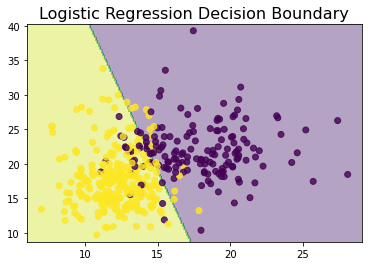

In [19]:
# plotting decision surface
import matplotlib.pyplot as plt

plt.figure()
plt.title('Logistic Regression Decision Boundary', fontsize = 16)
plot_decision_boundaries(X_train, Y_train, LogisticRegression)
plt.show()

### Using Inbuilt Logistic Regression

In [28]:
clf = LogisticRegression()

In [29]:
clf.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
Y_pred = clf.predict(X_test)

In [32]:
# check accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(Y_test, Y_pred)

In [33]:
score

0.9440559440559441